In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.interpolate import lagrange, CubicSpline, BarycentricInterpolator, CubicHermiteSpline
from scipy.integrate import simpson, romberg, trapezoid, quad, quadrature, fixed_quad
from scipy.special import roots_legendre
from scipy.optimize import newton, bisect, root_scalar, fixed_point, fsolve

## Funciones importantes:

In [2]:
def five_point_derivative(f,x,h):
    n = len(x)
    derivada = np.zeros(len(x))

    for i in range(n):
        if i == 0:
            derivada[i] = (-25*f(x[i]) + 48*f(x[i]+h) - 36*f(x[i]+2*h) + 16*f(x[i]+3*h) - 3*f(x[i]+4*h))/(12*h)
        elif i == n-1:
            derivada[i] = (25*f(x[i]) - 48*f(x[i]-h) + 36*f(x[i]-2*h) - 16*f(x[i]-3*h) + 3*f(x[i]-4*h))/(12*h)
        else:
            derivada[i] = (f(x[i]-2*h) - 8*f(x[i]-h) + 8*f(x[i]+h) - f(x[i]+2*h))/(12*h)
    return derivada

# Parcial/Taller Métodos Computacionales
**2024-2**

---

*Nombre:* Gabriel Rodríguez Suárez

*Identificación:* 1089931997

---
* Sea honest@
* $\color{red}{\text{La parte escrita del parcial/taller NO tendrá validez si no es sustentado
}}$
* Sea ordendado dando la solución a cada punto.
* *Asegurese que el notebook corra completamente*
* Todo lo que presente aquí será sujeto a evaluación.
* **Debe subirlo a carpeta de GitHub del curso antes del lunes 16 de diciembre a las 11:59 p.m.**

# 1
Una carga total $Q$ se distribuye uniformemente alrededor de un conductor en forma de anillo de radio $a$. Una carga $q$ se encuentra a una distancia $x$ horizontalmente a través del centro del anillo. La fuerza ejercida sobre la carga por el anillo está dada por:

$$F = \frac{1}{4\piϵ_0}\frac{qQx}{(x^2+a^2)^{3/2}}$$

con $q$ y $Q$ de $2\times 10^{-5}$C.

  * Escriba una función donde ingresen los valores de $a$ y $x$ para hallar la fuerza.
  * Haga un gráfico de $F(x)$ para un anillo de radio $a= 0.85$m para $0.1\leq x\leq 2.0$m
  * Usando el método de Newton-Raphson y otro diferente, para encontrar el valor de $x$ en el cual la fuerza será equivalente a 1.25 N.
  * Encuentre qué sucede si disminuimos el radio con respecto a la fuerza que experimentará la carga $q$.

## **Función con los valores $a$ y $x$**:

In [3]:
x = sp.Symbol('x')
q = 2e-05
Q = 2e-05
a = 0.85
F = (1/4*np.pi*8.85e-12)*(q*Q*x)/(x**2+a**2)**(3/2)
F_lambda = sp.lambdify(x, F)

## **Gráfico con los valores de $F(x)$:**

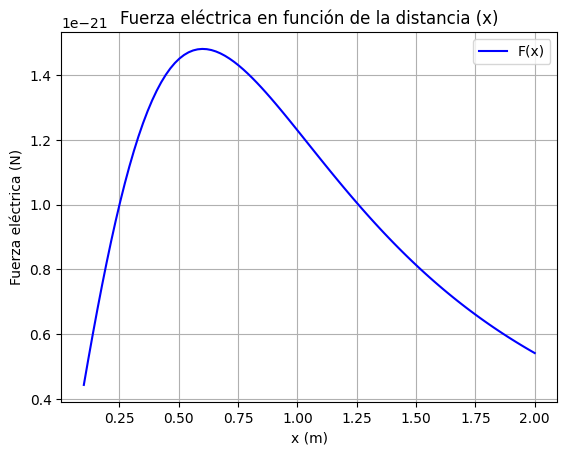

In [4]:
x = np.linspace(0.1, 2.0, 100)

plt.plot(x, F_lambda(x), 'b-', label='F(x)')
plt.title('Fuerza eléctrica en función de la distancia (x)')
plt.legend()
plt.xlabel('x (m)')
plt.ylabel('Fuerza eléctrica (N)')
plt.grid()
plt.show()

## **Valores para los cuales $F(x) \approx 1.25*10^{-21} $ N:**

A continuación se va a aplicar el concepto de traslación de funciones, en este caso se hará una de tipo vertical.

La traslación de funciones permite re-mapear la función, conservando su forma de la gráfica, pero con valores distintos en y.

$$ y = F(x)-c $$

Donde c tiene el valor de: $1.25*10^{-21}$ N

La traslación vertical hacia abajo, permitirá conocer en qué puntos la función $F(x)$, si se le restan $1.25*10^{-21}$ unidades, donde el valor de x es igual a este valor. Es decir, vamos a hacer esta resta, para que justamente en esos puntos el valor de $F(x) = 0$ y podamos aplicar los métodos de cálculo de raíces.

### **Traslación de la función $F(x)$:**

In [5]:
x = sp.Symbol('x')
q = 2e-05
Q = 2e-05
a = 0.85
F2 = ((1/4*np.pi*8.85e-12)*(q*Q*x)/(x**2+a**2)**(3/2)) - 1.25e-21
F2_prime = sp.diff(F2,x)
F2_lambda = sp.lambdify(x, F2)
F2_primel = sp.lambdify(x, F2_prime)

In [6]:
x = np.linspace(0.1, 2.0, 100)
#F2_lambda(x)

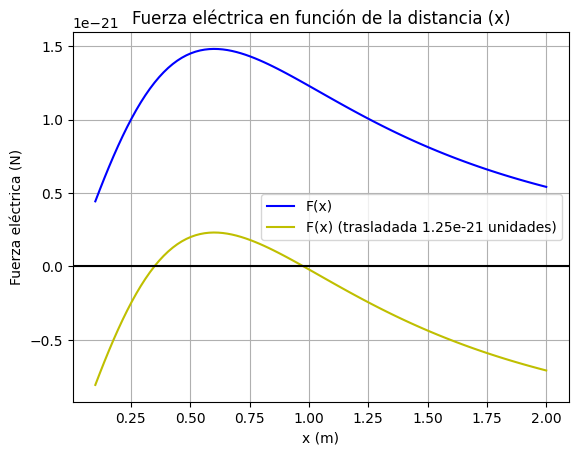

In [7]:
plt.plot(x, F_lambda(x), 'b-', label='F(x)')
plt.plot(x, F2_lambda(x), 'y-', label='F(x) (trasladada 1.25e-21 unidades)')
plt.title('Fuerza eléctrica en función de la distancia (x)')
plt.legend()
plt.xlabel('x (m)')
plt.ylabel('Fuerza eléctrica (N)')
plt.axhline(0, color='black')
plt.grid()
plt.show()

### **Aplicando el método de Newton-Raphson**

In [8]:
r2_new = newton(F2_lambda, 1, F2_primel)
r1_new = newton(F2_lambda, 0.3, F2_primel)
print('Las raíces son:')
print(f'r1 = {r1_new}')
print(f'r2 = {r2_new}')

Las raíces son:
r1 = 0.34862841338175543
r2 = 0.977848011193375


Ahora evaluemos en el código de la función F_lambda ($F(x)$), los valores que obtuvimos al hacer la transformación de funciones:

In [9]:
print(f'Cuando x = {r1_new}, F(r1) = {F_lambda(r1_new)}')
print(f'Cuando x = {r2_new}, F(r2) = {F_lambda(r2_new)}')

Cuando x = 0.34862841338175543, F(r1) = 1.2499999999999996e-21
Cuando x = 0.977848011193375, F(r2) = 1.25e-21


### **Aplicando el método de la secante:**

In [10]:
r2_sec = newton(F2_lambda, 1)
r1_sec = newton(F2_lambda, 0.3)
print('Las raíces son:')
print(f'r1 = {r1_sec}')
print(f'r2 = {r2_sec}')

Las raíces son:
r1 = 0.34862841338163947
r2 = 0.9778480111933748


In [11]:
print(f'Cuando x = {r1_sec}, F(r1) = {F_lambda(r1_sec)}')
print(f'Cuando x = {r2_sec}, F(r2) = {F_lambda(r2_sec)}')

Cuando x = 0.34862841338163947, F(r1) = 1.2499999999997633e-21
Cuando x = 0.9778480111933748, F(r2) = 1.2500000000000001e-21


## **Variación del radio a**

Aquí aparece un contador $i$ en la gráfica, este puede ser variado de 0 a 29, que son los ítems guardados en el array $a$.

In [12]:
q = 2e-05
Q = 2e-05
a = np.linspace(0.1, 2.0, 30)
F = lambda x, a: (1/4*np.pi*8.85e-12)*(q*Q*x)/(x**2+a**2)**(3/2)
dist = np.linspace(0.1,2.0,100)

In [13]:
array = []
for i in range(len(a)):
  array.append(F(dist, a[i]))
array = np.array(array)

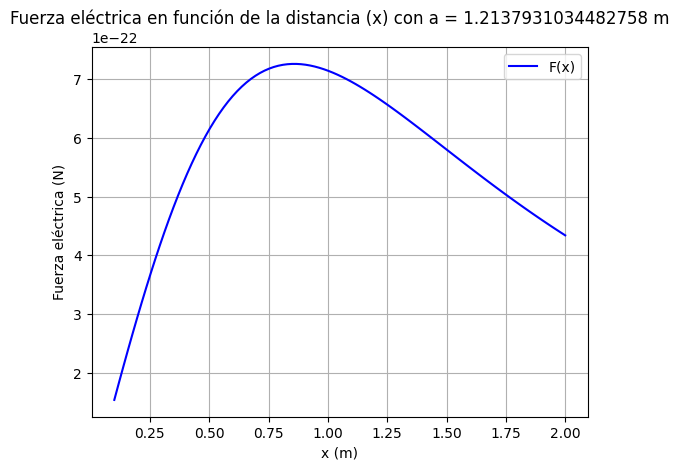

In [14]:
i = 17
plt.plot(dist, array[i], 'b-', label='F(x)')
plt.title(f'Fuerza eléctrica en función de la distancia (x) con a = {a[i]} m')
plt.legend()
plt.xlabel('x (m)')
plt.ylabel('Fuerza eléctrica (N)')
plt.grid()
plt.show()

# 2

La ley de Planck expresa la densidad espectral de energía de la radiación electromagnética emitida por un cuerpo negro en equilibrio térmico:

$$
u(\lambda, T) = \frac{8 \pi h c}{\lambda^5} \frac{1}{\exp\left(\frac{h c}{\lambda k_B T}\right) - 1},
$$

donde $T$ es la temperatura de equilibrio, $\lambda$ es la longitud de onda, $h = 6.62606957 \times 10^{-34} \ \text{J*s}$ es la constante de Planck, $k_B = 1.3806488 \times 10^{-23} \ \text{J*K}^{-1}$ es la constante de Boltzmann, y $c = 2.99792458 \times 10^8 \ \text{m*s}^{-1}$ es la velocidad de la luz en el vacío. La función $u(\lambda, T)d\lambda$ representa la energía radiada en el intervalo espectral $(\lambda, \lambda + d\lambda)$.

Introduciendo la variable adimensional

$$
x = \frac{\lambda}{\lambda_0},
$$

y los parámetros dependientes de la temperatura:

$$
\lambda_0 = \frac{h c}{k_B T}, \quad K = \frac{8 \pi k_B T}{\lambda_0^4},
$$

la ley de Planck se convierte en:

$$
u(\lambda, T) = K \frac{1}{x^5 \left(e^{1/x} - 1\right)}.
$$

La ley de desplazamiento de Wien establece que, para un cuerpo negro, la longitud de onda $\lambda_{\text{max}}$ correspondiente al máximo de $u(\lambda, T)$ es inversamente proporcional a la temperatura $T$ o, equivalentemente:

$$
\lambda_{\text{max}} T = 2.897768 \times 10^{-3} \ \text{m*K}.
$$

* Escriba una función para la densidad espectral como función de $\lambda$ y $T$

* Graficar la densidad espectral de energía $u(\lambda, T)$ para temperaturas de equilibrio $T = 2000, 4000, 6000$ y $8000 \ \text{K}$.

* Encuentre de manera simbólica $\frac{\partial u(\lambda, T)}{\partial \lambda} $ y realice un gráfico para las temperaturas y longitudes de onda usadas en el numeral anterior.

* Hallar el máximo de $u(\lambda, T)$ para la radiación electromagnética del Sol, considerando la temperatura efectiva de la fotosfera $T = 5778 \ \text{K}$. Usar el método numérico de Newton para la derivada y comprobar la validez de la ley de Wien.


## Función $u(\lambda,T)$:

In [15]:
h = 6.62606957e-34 #Constante de Planck.
k_B = 1.3806488e-23 #Constante de Boltzmann.
c = 2.99792458e08 #Velocidad de la luz en el vacío.
l = sp.Symbol('l')
T = sp.Symbol('T')
u_s = (8*sp.pi*h*c)/(l**5) * (1/(sp.exp(h*c/(l*k_B*T)) - 1))
du_dl_s = sp.diff(u_s,l)
u = sp.lambdify((l,T), u_s)
du_dl = sp.lambdify((l,T), du_dl_s)

## Constantes y DataFrames con la información:

Aquí se calcularon las constantes de Wien, $\lambda_{0}$ y $\lambda_{máx}$. Se guardó en un Dataframe el rango de las longitudes de onda para cada estrella.

In [16]:
T = np.linspace(2000,8000, 4)
#Se guardan los valores de T en un array.
cons_wien = 2.897768e-03
#Aquí se calculan las constantes de l_máxima para las diferentes temperaturas.
l_max = cons_wien/T
#Aquí se calculan las constantes de l_o para cada temperatura:
l_o = (h*c)/(k_B*T)

A continuación, se calculan el rango de longitudes de onda desde 0 hasta $\lambda_{0}$ según los datos proporcionados para cada temperatura, aplicando la ley de Wien:

In [17]:
lambdas = []

for j in range(len(l_max)):
    lambdas.append(np.linspace(0, l_o[j], 100))
lambdas = np.array(lambdas)

In [18]:
dicc_temperaturas = {'2000K': lambdas[0], '4000K': lambdas[1], '6000K': lambdas[2], '8000K': lambdas[3]}

lon_temp = pd.DataFrame(dicc_temperaturas)

Se guardan los anteriores valores en un DataFrame de pandas y luego de operan con la función $u(\lambda,T)$ y se guarda en otro DataFrame:

In [19]:
dens = u(lon_temp, T)

## Calcular la derivada:

La derivada ya fue calculada en el literal de escribir la función $u(\lambda,T)$, aquí están las gráficas.

Se creó una **segunda función de derivada** (no se malentienda con una segunda derivada), para poder aplicar el método de búsqueda de raíces, esto ya que la función: 

$$\frac{\partial u(\lambda,T)}{\partial \lambda}$$ 

es multivariada, por lo que la nueva función: 

$$\frac{\partial u2(\lambda,T_{fijo})}{\partial \lambda}$$

Ya se le fija el parámetro $T$ para que el método no devuelva un error.

In [20]:
l = sp.Symbol('l')
u2 = (8*sp.pi*h*c)/(l**5) * (1/(sp.exp(h*c/(l*k_B*2000)) - 1))
du2s = sp.diff(u2,l)
du2_2000 = sp.lambdify(l, du2s)

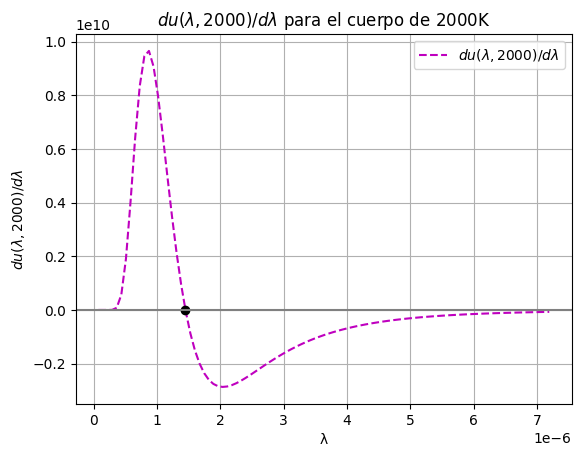

In [21]:
d_dens = du_dl(lon_temp, T)
r2000 = fsolve(du2_2000, 1.5e-06)
r2000

plt.plot(lon_temp['2000K'], d_dens['2000K'], 'm--', label='$du(λ,2000)/dλ$')
plt.plot(r2000, du2_2000(r2000), 'ko')
plt.title('$du(λ,2000)/dλ$ para el cuerpo de 2000K')
plt.legend()
plt.xlabel('λ')
plt.ylabel('$du(λ,2000)/dλ$')
plt.axhline(0, color='grey')
plt.grid()
plt.show()

In [22]:
l = sp.Symbol('l')
u2 = (8*sp.pi*h*c)/(l**5) * (1/(sp.exp(h*c/(l*k_B*4000)) - 1))
du2s = sp.diff(u2,l)
du2_4000 = sp.lambdify(l, du2s)

r4000 = fsolve(du2_4000, 0.7e-06)

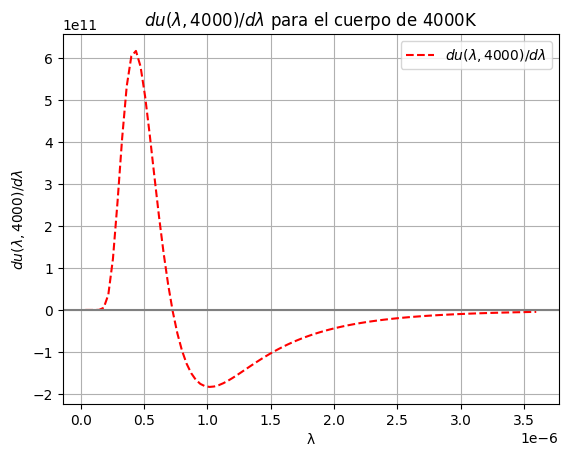

In [23]:
plt.plot(lon_temp['4000K'], d_dens['4000K'], 'r--', label='$du(λ,4000)/dλ$')
plt.title('$du(λ,4000)/dλ$ para el cuerpo de 4000K')
plt.legend()
plt.xlabel('λ')
plt.ylabel('$du(λ,4000)/dλ$')
plt.axhline(0, color='grey')
plt.grid()
plt.show()

In [24]:
l = sp.Symbol('l')
u2 = (8*sp.pi*h*c)/(l**5) * (1/(sp.exp(h*c/(l*k_B*6000)) - 1))
du2s = sp.diff(u2,l)
du2_6000 = sp.lambdify(l, du2s)

r6000 = fsolve(du2_6000, 0.5e-06)

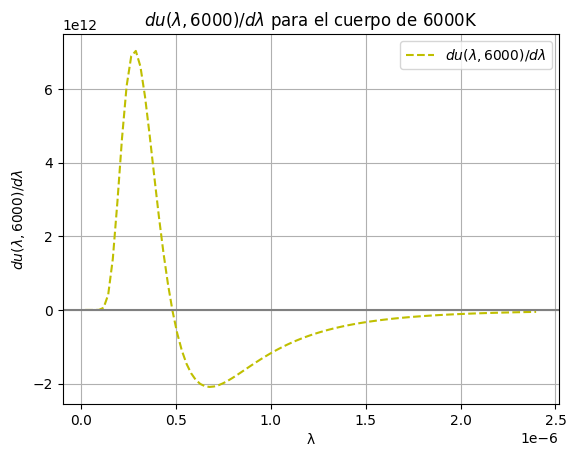

In [25]:
plt.plot(lon_temp['6000K'], d_dens['6000K'], 'y--', label='$du(λ,6000)/dλ$')
plt.title('$du(λ,6000)/dλ$ para el cuerpo de 6000K')
plt.legend()
plt.xlabel('λ')
plt.ylabel('$du(λ,6000)/dλ$')
plt.axhline(0, color='grey')
plt.grid()
plt.show()

In [26]:
l = sp.Symbol('l')
u2 = (8*sp.pi*h*c)/(l**5) * (1/(sp.exp(h*c/(l*k_B*8000)) - 1))
du2s = sp.diff(u2,l)
du2_8000 = sp.lambdify(l, du2s)

r8000 = fsolve(du2_8000, 0.3e-06)

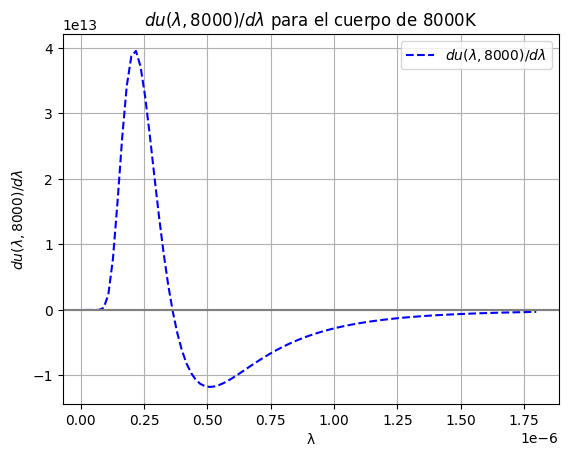

In [27]:
plt.plot(lon_temp['8000K'], d_dens['8000K'], 'b--', label='$du(λ,8000)/dλ$')
plt.title('$du(λ,8000)/dλ$ para el cuerpo de 8000K')
plt.legend()
plt.xlabel('λ')
plt.ylabel('$du(λ,8000)/dλ$')
plt.axhline(0, color='grey')
plt.grid()
plt.show()

## Evaluar el máximo en la función:

Ya conociendo las raíces de las derivadas, calculamos las raíces obtenidas y las graficamos en las curvas de las diferentes estrellas:

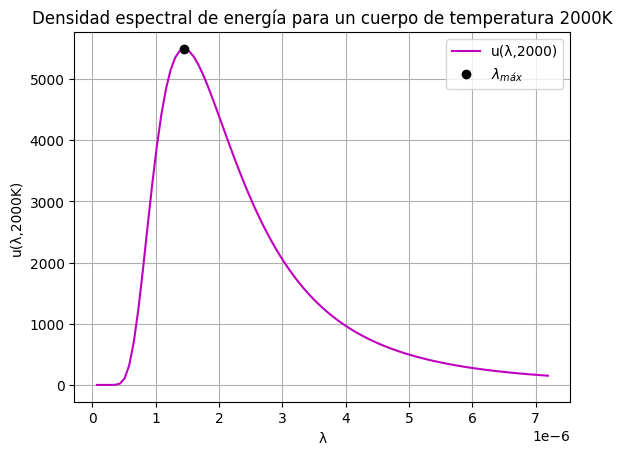

In [28]:
dens = u(lon_temp, T)

plt.plot(lon_temp['2000K'], dens['2000K'], 'm-', label='u(λ,2000)')
plt.plot(r2000, u(r2000,T[0]), 'ko', label='$λ_{máx}$')
plt.title('Densidad espectral de energía para un cuerpo de temperatura 2000K')
plt.legend()
plt.xlabel('λ')
plt.ylabel('u(λ,2000K)')
plt.grid()
plt.show()

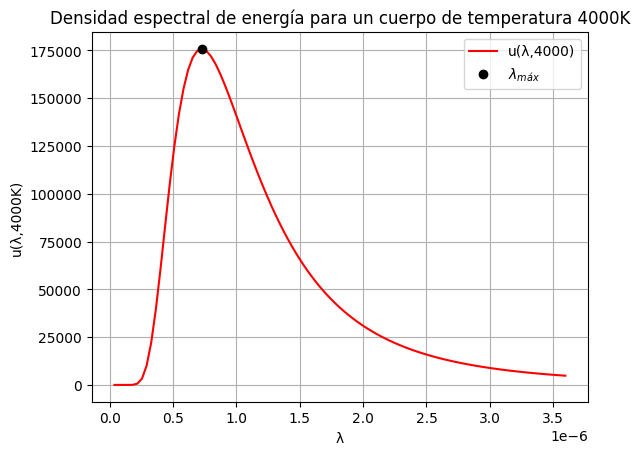

In [29]:
plt.plot(lon_temp['4000K'], dens['4000K'], 'r-', label='u(λ,4000)')
plt.plot(r4000, u(r4000,T[1]), 'ko', label='$λ_{máx}$')
plt.title('Densidad espectral de energía para un cuerpo de temperatura 4000K')
plt.legend()
plt.xlabel('λ')
plt.ylabel('u(λ,4000K)')
plt.grid()
plt.show()

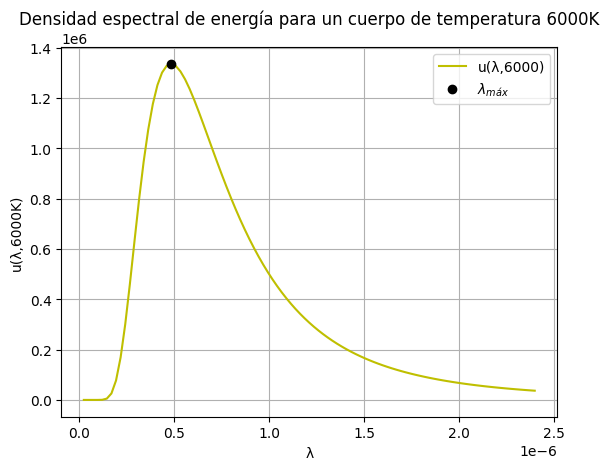

In [30]:
plt.plot(lon_temp['6000K'], dens['6000K'], 'y-', label='u(λ,6000)')
plt.plot(r6000, u(r6000,T[2]), 'ko', label='$λ_{máx}$')
plt.title('Densidad espectral de energía para un cuerpo de temperatura 6000K')
plt.legend()
plt.xlabel('λ')
plt.ylabel('u(λ,6000K)')
plt.grid()
plt.show()

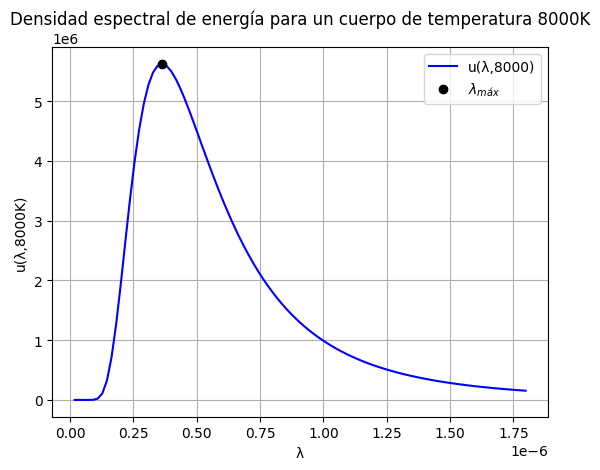

In [31]:
plt.plot(lon_temp['8000K'], dens['8000K'], 'b-', label='u(λ,8000)')
plt.plot(r8000, u(r8000,T[3]), 'ko', label='$λ_{máx}$')
plt.title('Densidad espectral de energía para un cuerpo de temperatura 8000K')
plt.legend()
plt.xlabel('λ')
plt.ylabel('u(λ,8000K)')
plt.grid()
plt.show()

## Ley de Wien:

Comprobamos, con los valores obtenidos en el cálculo: r2000, r4000, r6000 y r8000, que son los valores de $\lambda_{máx}$ de cada estrella y con la ecuación de la ley de Wien:

$$
\lambda_{\text{max}} T = 2.897768 \times 10^{-3} \ \text{m*K}.
$$

A ver si se cumple.

In [32]:
T2000 = cons_wien/r2000
print('Para la estrella de 2000K:')
print(f'Por raíz de su derivada: {T2000}')
print(f'Aplicando directamente la ley de Wien: {T[0]}')
print(f'Comparando con np.isclose:')
print(np.isclose(T2000, T[0]))

Para la estrella de 2000K:
Por raíz de su derivada: [1999.99715554]
Aplicando directamente la ley de Wien: 2000.0
Comparando con np.isclose:
[ True]


In [33]:
T4000 = cons_wien/r4000
print('Para la estrella de 4000K:')
print(f'Por raíz de su derivada: {T4000}')
print(f'Aplicando directamente la ley de Wien: {T[1]}')
print(f'Comparando con np.isclose:')
print(np.isclose(T4000, T[1]))

Para la estrella de 4000K:
Por raíz de su derivada: [3999.99431107]
Aplicando directamente la ley de Wien: 4000.0
Comparando con np.isclose:
[ True]


In [34]:
T6000 = cons_wien/r6000
print('Para la estrella de 6000K:')
print(f'Por raíz de su derivada: {T6000}')
print(f'Aplicando directamente la ley de Wien: {T[2]}')
print(f'Comparando con np.isclose:')
print(np.isclose(T6000, T[2]))

Para la estrella de 6000K:
Por raíz de su derivada: [5999.99146661]
Aplicando directamente la ley de Wien: 6000.0
Comparando con np.isclose:
[ True]


In [35]:
T8000 = cons_wien/r8000
print('Para la estrella de 8000K:')
print(f'Por raíz de su derivada: {T8000}')
print(f'Aplicando directamente la ley de Wien: {T[3]}')
print(f'Comparando con np.isclose:')
print(np.isclose(T8000, T[3]))

Para la estrella de 8000K:
Por raíz de su derivada: [7999.98862215]
Aplicando directamente la ley de Wien: 8000.0
Comparando con np.isclose:
[ True]


## Cálculo para el Sol:

In [36]:
T_sol = 5778 #K
l_o_sol = (h*c)/(k_B*T_sol)
l_max_sol = cons_wien/T_sol
print('Para el Sol:')
print(f'l_o = {l_o_sol}')
print(f'l_max = {l_max_sol}')

lambda_sol = np.linspace(5e-08, l_o_sol, 100)

dens_sol = u(lambda_sol,T_sol)

Para el Sol:
l_o = 2.490095119390473e-06
l_max = 5.015174800969193e-07


In [37]:
l = sp.Symbol('l')
u2 = (8*sp.pi*h*c)/(l**5) * (1/(sp.exp(h*c/(l*k_B*T_sol)) - 1))
du2s = sp.diff(u2,l)
du2_sol = sp.lambdify(l, du2s)

In [38]:
r_sol = fsolve(du2_sol,0.5e-06)

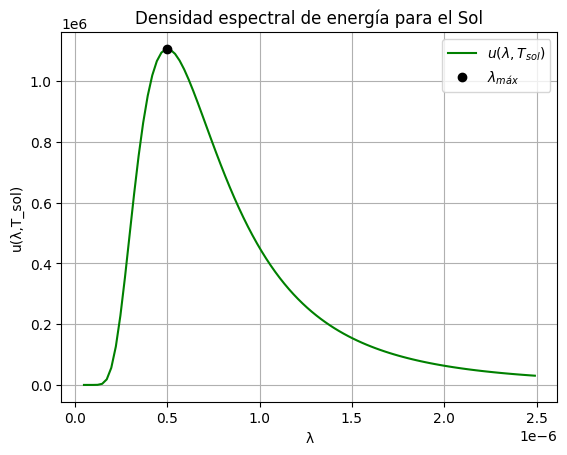

In [39]:
plt.plot(lambda_sol, dens_sol, 'g-', label='$u(λ,T_{sol})$')
plt.plot(r_sol, u(r_sol,T_sol), 'ko', label='$λ_{máx}$')
plt.title('Densidad espectral de energía para el Sol')
plt.legend()
plt.xlabel('λ')
plt.ylabel('u(λ,T_sol)')
plt.grid()
plt.show()

In [40]:
d_dens_sol = du_dl(lambda_sol, T_sol)

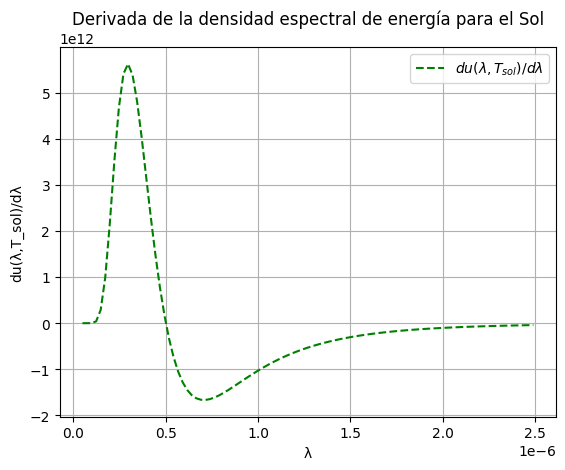

In [41]:
plt.plot(lambda_sol, d_dens_sol, 'g--', label='$du(λ,T_{sol})/dλ$')
plt.title('Derivada de la densidad espectral de energía para el Sol')
plt.legend()
plt.xlabel('λ')
plt.ylabel('du(λ,T_sol)/dλ')
plt.grid()
plt.show()

In [42]:
Temperatura_sol = cons_wien/r_sol

print('Ahora el valor para la temperatura del Sol es de:')
print(f'{Temperatura_sol}')
print('La cual es súper cercana a la dada por el problema:')
print(T_sol, 'K')

Ahora el valor para la temperatura del Sol es de:
[5777.99178234]
La cual es súper cercana a la dada por el problema:
5778 K


# 3

La siguiente función describe la distribución de temperatura de una placa rectangular para $-2.0\leq x \leq 0$ y $0\leq y\leq 3$

$$T(x,y) = 2 + x - y + 2x^2 + 2xy + y^2$$


* Desarrolle una función para la $T(x,y)$.
* Haga un dataframe con los valores de $x$, $y$ y $T$ tomando 50 datos en total y realice un gráfico de calor para la placa metálica. *Ayuda: emplee `np.meshgrid` y `plt.pcolormesh`*.
* Ahora, utilizando unicamente 9 puntos $(x,y)$ de $T$, use la interpolación de Lagrange para encontrar el valor de $T(-1.63, 1.627)$, y determine el error absoluto y relativo.
* Realice el mismo procedimiento anterior para Splines Cúbicas.


## Gráfica de la función $T(x,y)$:

In [43]:
T = lambda x,y: 2 +x - y + 2*(x**2) + 2*x*y + y**2
x = np.linspace(-2,0,50)
y = np.linspace(0,3,50)

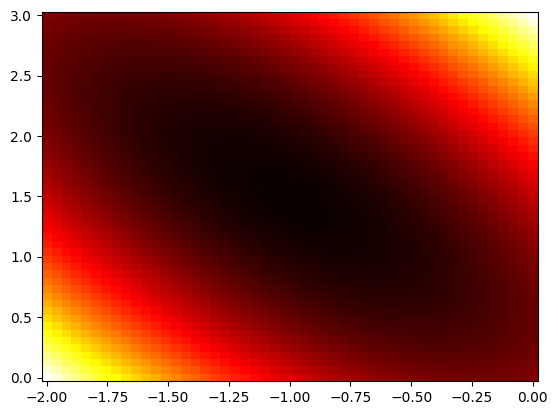

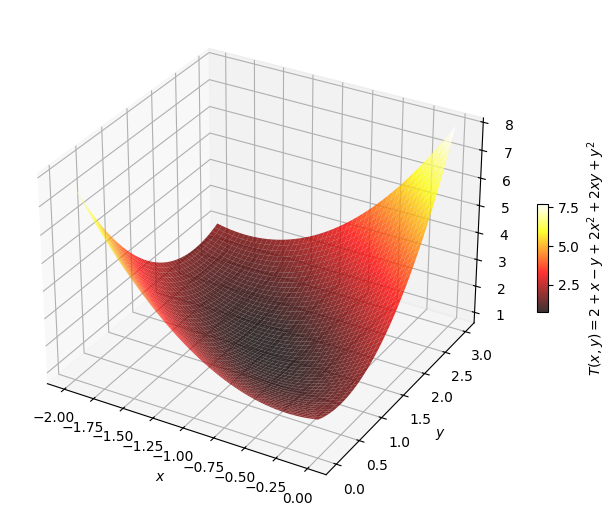

In [44]:
X, Y = np.meshgrid(x,y)
Z = T(X,Y)
plt.pcolormesh(X,Y,Z, cmap='hot')
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie
surf = ax.plot_surface(X, Y, Z, cmap='hot', alpha=0.8)

# Etiquetas y título

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')


# Agregar barra de color
fig.colorbar(surf, shrink=0.2, aspect=10, label='$T(x,y) = 2 + x - y +2x^2 +2xy + y^2$')


plt.show()

In [45]:
x, y = np.linspace(-2,0,9), np.linspace(0,3,9)
T(-1.63,1.627)

1.3999090000000005

# 4
Usando los siguiente datos realice lo siguiente:



```python
x = [-5.      -3.33333 -1.66667  0.       1.66667  3.33333  5.     ]

y = [1.48672e-06 1.54228e-03 9.94771e-02 3.98942e-01 9.94771e-02 1.54228e-03
 1.48672e-06]
```



* Lealos y grafiquelos en un dataframe.
* Usando interpolación de Lagrange, encuentre el polinomio asociado y grafiquelo.
* Ahora, use la interpolación de Hermite para obtener el polinomio.
* Sabemos que los puntos parten de la distribución normal que se define como:
$$f(x) = \frac{1}{\sqrt{2\pi}}\exp^{-x^2/2}$$

* Haga una gráfica de $f(x)$ y comparela con los polinomios anteriores en función del error, encuentre el valor teórico.
* Encuentre los puntos de inflexión para $f(x)$ númericamente, y compare con el valor exacto. Halle el error absoluto.
* Integre la función entre $-1\leq x\leq 1$ y para $-3\leq x\leq x$. Si el área total de $-\infty \leq x\leq \infty $ deber ser igual a 1, a que proporción de la curva hacen parte los intervalos del punto anterior.

## **Dataframe de los datos:**

In [46]:
x = np.array([-5.0, -3.33333, -1.66667,  0.0, 1.66667,  3.33333,  5.0])
y = np.array([1.48672e-06, 1.54228e-03, 9.94771e-02, 3.98942e-01, 9.94771e-02, 1.54228e-03, 1.48672e-06])

dicc2 = {'x': x, 'y': y}
datos = pd.DataFrame(dicc2)
datos

,x,y
0,-5.00000,0.000001
1,-3.33333,0.001542
2,-1.66667,0.099477
3,0.00000,0.398942
4,1.66667,0.099477
5,3.33333,0.001542
6,5.00000,0.000001


## **Polinomio de Lagrange:**

In [47]:
pol_lagrange = lagrange(x,y)
pol_lagrange1 = np.poly1d(pol_lagrange)
print(pol_lagrange1)

            6             5           4             3          2
-0.0003248 x - 2.827e-19 x + 0.01316 x - 1.475e-17 x - 0.1418 x - 2.893e-17 x + 0.3989


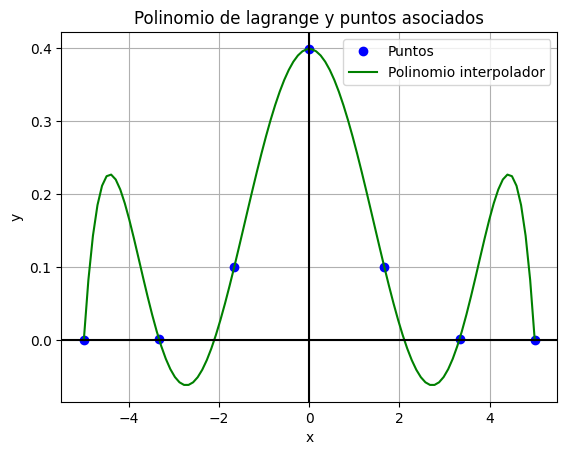

In [48]:
x_continuo = np.linspace(min(x), max(x), 100)

plt.plot(x, y, 'bo', label='Puntos')
plt.plot(x_continuo, pol_lagrange1(x_continuo), 'g-', label='Polinomio interpolador')
plt.title('Polinomio de lagrange y puntos asociados')
plt.legend()
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

## **Por método de interpolación de Hermite:**

In [49]:
dy = np.gradient(y, x, edge_order=2)
pol_hermite = CubicHermiteSpline(x,y,dy)

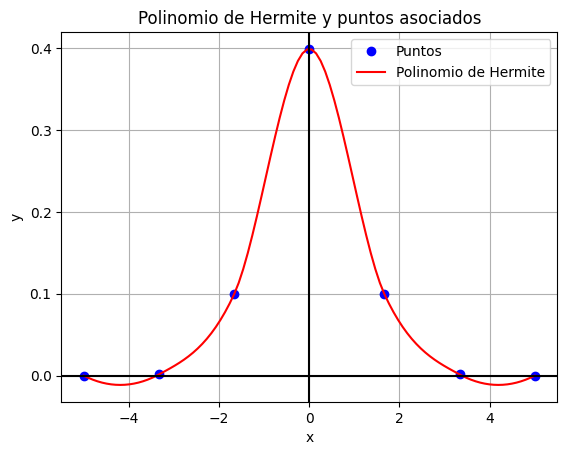

In [50]:
x_continuo = np.linspace(min(x), max(x), 100)

plt.plot(x, y, 'bo', label='Puntos')
plt.plot(x_continuo, pol_hermite(x_continuo), 'r-', label='Polinomio de Hermite')
plt.title('Polinomio de Hermite y puntos asociados')
plt.legend()
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

## **Usando la funcion real:**

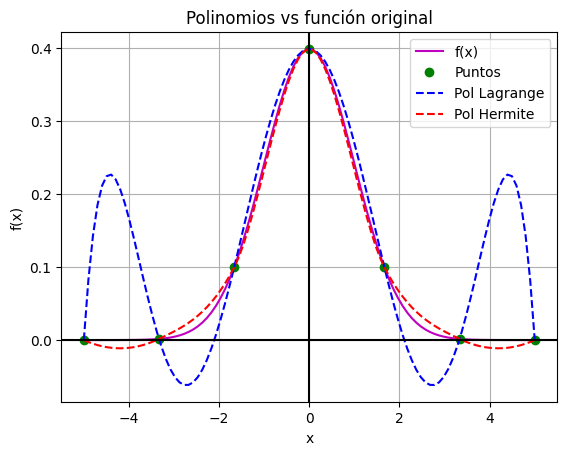

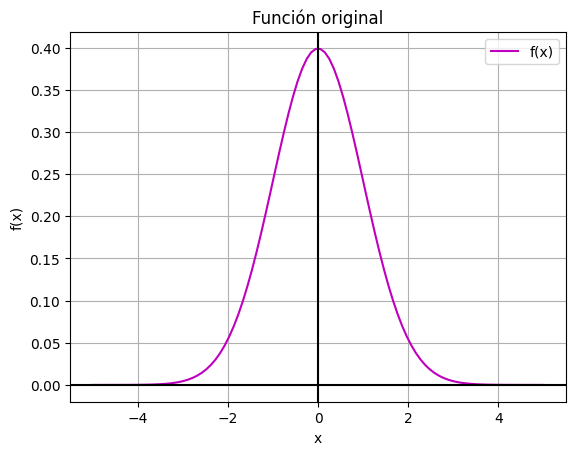

In [51]:
f = lambda u: np.exp((-u**2)/2)/np.sqrt(2*np.pi)
f_x = f(x_continuo)

plt.plot(x_continuo, f_x, 'm-',label='f(x)')
plt.plot(x, y, 'go', label='Puntos')
plt.plot(x_continuo, pol_lagrange1(x_continuo), 'b--', label='Pol Lagrange')
plt.plot(x_continuo, pol_hermite(x_continuo), 'r--', label='Pol Hermite')
plt.title('Polinomios vs función original')
plt.legend()
plt.axvline(0, color='black')
plt.axhline(0, color='black')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show()

plt.plot(x_continuo, f_x, 'm-',label='f(x)')
plt.title('Función original')
plt.legend()
plt.axvline(0, color='black')
plt.axhline(0, color='black')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show()

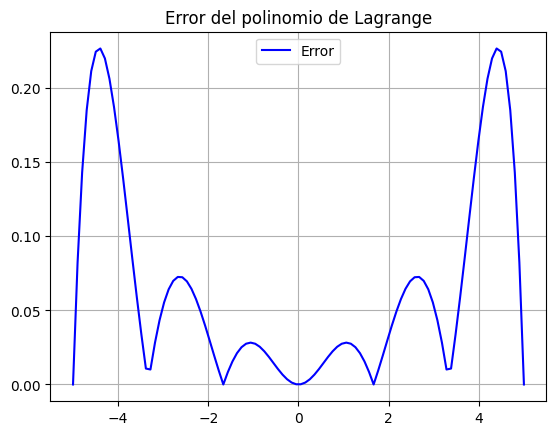

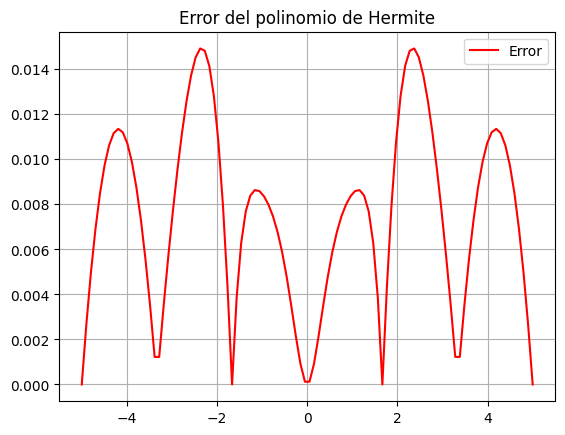

In [52]:
error_lagrange = np.abs(f_x - pol_lagrange1(x_continuo))
error_hermite = np.abs(f_x - pol_hermite(x_continuo))

plt.plot(x_continuo, error_lagrange, 'b-', label='Error')
plt.title('Error del polinomio de Lagrange')
plt.legend()
plt.grid()
plt.show()

plt.plot(x_continuo, error_hermite, 'r-', label='Error')
plt.title('Error del polinomio de Hermite')
plt.legend()
plt.grid()
plt.show()

## Cálculo de la derivada para hallar el máximo local:

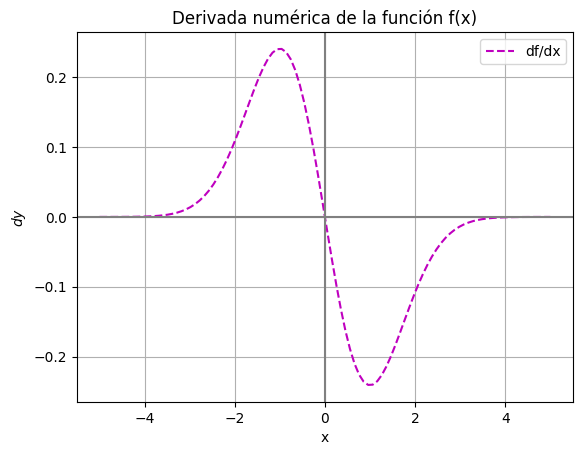

In [53]:
dicc3 = {'x': x_continuo , 'f(x)': f_x}
datos_funcion = pd.DataFrame(dicc3)
dy_numerica = np.gradient(f_x, x_continuo, edge_order=2)
datos_funcion['df'] = dy_numerica

plt.plot(x_continuo, dy_numerica, 'm--', label='df/dx')
plt.title('Derivada numérica de la función f(x)')
plt.legend()
plt.xlabel('x')
plt.ylabel('$dy$')
plt.axvline(0, color='grey')
plt.axhline(0, color='grey')
plt.grid()
plt.show()

In [54]:
cero_numerico = datos_funcion['df'][49]

Ahora, implementando los recursos simbólicos de Sympy, calacularemos el valor real de la derivada con el método de **sp.diff**:

In [55]:
u = sp.Symbol('u')
f_s = sp.exp((-u**2)/2)/sp.sqrt(2*sp.pi)
f_s

sqrt(2)*exp(-u**2/2)/(2*sqrt(pi))

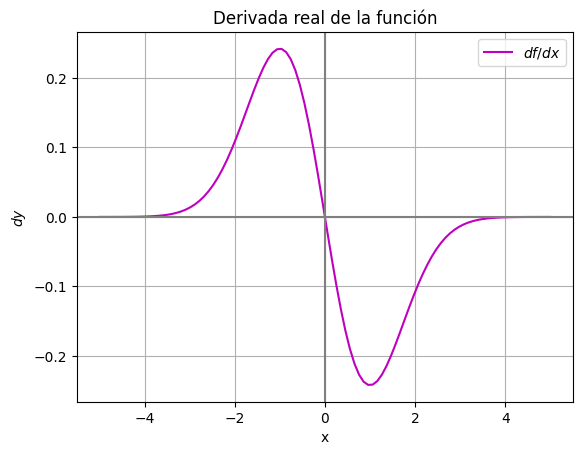

In [56]:
df_s = sp.diff(f_s,u)
df = sp.lambdify(u, df_s)
dy_real = df(x_continuo)

plt.plot(x_continuo, dy_real, 'm-', label='$df/dx$')
plt.title('Derivada real de la función')
plt.legend()
plt.xlabel('x')
plt.ylabel('$dy$')
plt.axvline(0, color='grey')
plt.axhline(0, color='grey')
plt.grid()
plt.show()

In [57]:
cero_real = newton(df,0.1)
cero_real

print('Aquí comparemos los ceros obtenidos en los métodos de cálculo de derivadas:')
print(f'El cero de la derivada numérica tiene el valor: x = {cero_numerico}')
print(f'El cero real con la derivada real tiene el valor: x = {cero_real}')

Aquí comparemos los ceros obtenidos en los métodos de cálculo de derivadas:
El cero de la derivada numérica tiene el valor: x = 0.020020610047816412
El cero real con la derivada real tiene el valor: x = 3.2430067918652115e-23


Lo anterior para explicar que la función $f(x)$ tiene un punto de inflexión en $x=0$, que según los dos anteriores cálculos se encuentre en este valor.

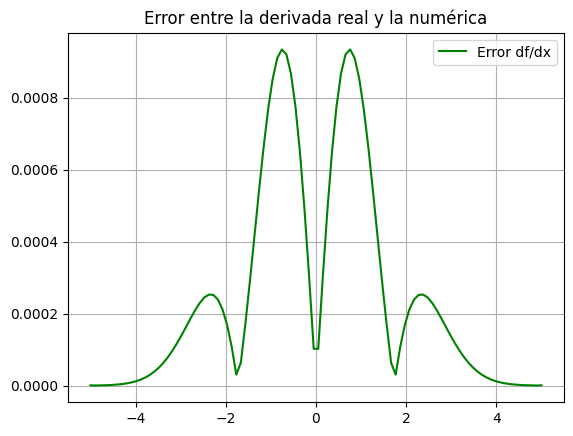

In [58]:
error_derivada = np.abs(dy_numerica - dy_real)

plt.plot(x_continuo, error_derivada, 'g-', label='Error df/dx')
plt.title('Error entre la derivada real y la numérica')
plt.legend()
plt.grid()
plt.show()

## Cálculo de los puntos de inflexión:

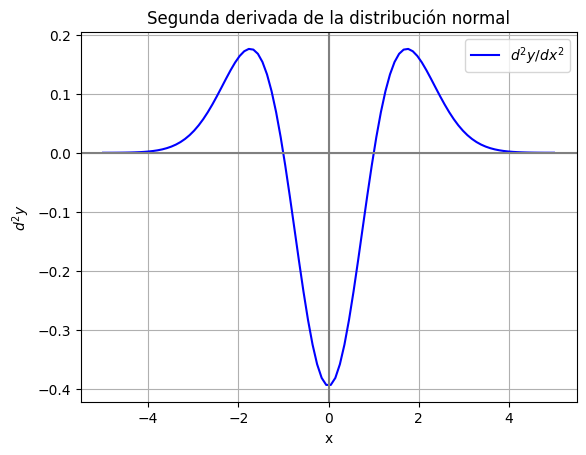

In [59]:
d2y_numerica = np.gradient(dy_numerica, x_continuo, edge_order=2)

plt.plot(x_continuo, d2y_numerica, 'b-', label='$d^{2}y/dx^{2}$')
plt.title('Segunda derivada de la distribución normal')
plt.legend()
plt.xlabel('x')
plt.ylabel('$d^{2}y$')
plt.axvline(0, color='grey')
plt.axhline(0, color='grey')
plt.grid()
plt.show()

In [60]:
d2y_interpol = BarycentricInterpolator(x_continuo, d2y_numerica)

r1 = newton(d2y_interpol, -1)
r2 = newton(d2y_interpol, 1)
print(r1,r2)

-1.0034044582508226 1.0034044582508224


Ahora vamos a calcular los puntos de inflexión usando la derivada real, calculada por Sympy.

In [61]:
u = sp.Symbol('u')
f_s = sp.exp((-u**2)/2)/sp.sqrt(2*sp.pi)
d2f_s = sp.diff(f_s,u,2) 
d2f = sp.lambdify(u,d2f_s)

r1 = newton(d2f, -1)
r2 = newton(d2f, 1)

print('Los puntos de inflexión son:')
print(r1,r2)

Los puntos de inflexión son:
-1.0 1.0


## Integrando la función en los intervalos $[-1,1]$ y $[-3,3]$:

In [62]:
x1 = np.linspace(-1,1,100)
integral_1_trapecio = trapezoid(f(x1), x1)
print('La integral del intervalo [-1,1]:')
print(f'{integral_1_trapecio}')

integral_1_quad, error1 = quad(f,-1,1)
print('Por cuadratura gaussiana:')
print(f'{integral_1_quad}')

La integral del intervalo [-1,1]:
0.6826730329991479
Por cuadratura gaussiana:
0.682689492137086


In [63]:
x3 = np.linspace(-3,3,100)
integral_3_trapecio = trapezoid(f(x3), x3)
print('La integral del intervalo [-3,3]:')
print(f'{integral_3_trapecio}')

integral_3_quad, error1 = quad(f,-3,3)
print('Por cuadratura gaussiana:')
print(f'{integral_3_quad}')

La integral del intervalo [-3,3]:
0.9972920676269242
Por cuadratura gaussiana:
0.9973002039367399


Cuando se calcula el valor de un porcentaje, estos se definen multiplicando el valor original por una cierta cantidad comprendida en el intervalo $[0,1.00]$, donde por ejemplo el 90% corresponde a 0.9, el 80% a 0.8,... y así sucesivamente.

Aquí para el intervalo $[-1,1]$ obtenemos el valor, redondeado, de 0.68, lo que equivale al 68%, en Estadística está relacionado con el concepto de la desviación estándar, la cual para el caso de esta función, cualquier dato entre 0 y 1, o -1 y 0, corresponde al 34% de los datos, o una distribución estándar de distancia al valor promedio.

Mientras que para el intervalo $[-3,3]$ el valor es de 0.99, el cual corresponde al 99%.

Esta es una distribución normal, o gaussiana, de datos en estadística, por lo que los datos que se ubiquen en el intervalo de $[-3,3]$ corrosponden a aquellos que están a tres desviaciones estándar del valor promedio. Mientras que los que entran en el intervalo $[-1,1]$ corresponden a los que están a una desviación estándar del valor promedio.

# 5

La función de onda del electrón en un estado $2s$ $(n = 2, l = 0, \text{ y } m = 0)$ dentro del átomo de hidrógeno puede definirse en unidades radiales adimensionales como:

$$ \psi_{200}(r, \theta, \varphi) = \frac{1}{4\sqrt{2\pi}} (2 - r) e^{-r/2}. $$

La probabilidad de que el electrón se localice entre las posiciones radiales $r = 0$ y $R$ se da por:

$$ \int_{0}^{R} \int_{0}^{\pi} \int_{0}^{2\pi} |\Psi_{210}(r, \theta, \varphi)|^2 r^2 \, dr \, \sin \theta \, d\theta \, d\varphi = \frac{1}{8} \int_{0}^{R} r^2 (2 - r)^2 e^{-r} \, dr. $$

* Realiza una gráfica de la función de onda para $0\leq r\leq 10$. Luego encuentra la función densidad de probabilidad $|\psi_{200}(r, \theta, \varphi)|^2$ y graficala, hallando su máximo utilizando un método númerico de derivación.

* Calcula las probabilidades de encontrar el electrón entre las posiciones radiales $ r = 0 $ y $ R \in [10, 25] $, con incrementos iguales a 1, utilizando el método de Romberg con una precisión relativa $ \epsilon = 10^{-8} $.

* Calcula la integral radial desde $ r = 0 $ hasta $ \infty $ utilizando las rutinas de integración `quad` simple y adaptativa. Verifica que la probabilidad total de encontrar el electrón en cualquier parte del espacio es, de hecho, igual a 1.


## **Gráfica de la función**

In [64]:
r = sp.Symbol('r')
psi_200_s = (1/(4*sp.sqrt(2*sp.pi)))*(2-r)*sp.exp(-r/2)
psi_abs_s = np.abs((1/(4*sp.sqrt(2*sp.pi)))*(2-r)*sp.exp(-r/2))**2
psi_200 = sp.lambdify(r, psi_200_s)
psi_abs = sp.lambdify(r, psi_abs_s)

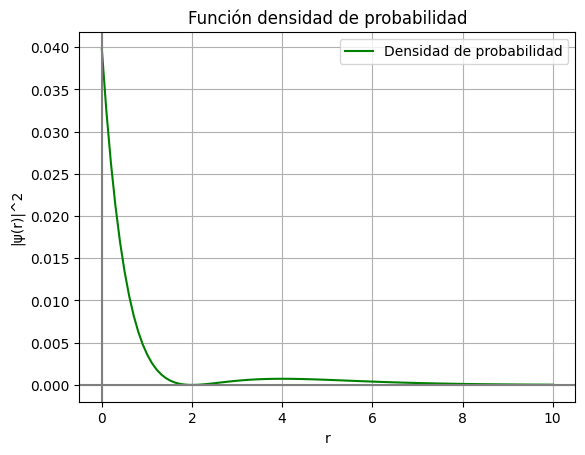

In [65]:
dist = np.linspace(0,10,100)
dens_abs = psi_abs(dist)

plt.plot(dist, dens_abs, 'g-', label='Densidad de probabilidad')
plt.title('Función densidad de probabilidad')
plt.legend()
plt.xlabel('r')
plt.ylabel('|ψ(r)|^2')
plt.axvline(0, color='grey', linestyle='-')
plt.axhline(0, color='grey', linestyle='-')
plt.grid()
plt.show()

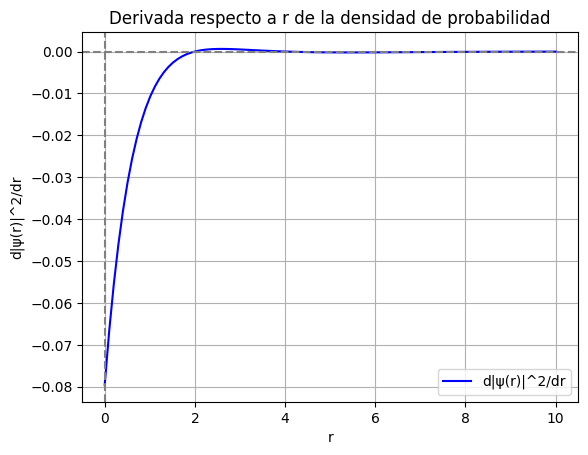

In [66]:
d_psi = five_point_derivative(psi_abs, dist, 0.1)

plt.plot(dist, d_psi, 'b-', label='d|ψ(r)|^2/dr')
plt.title('Derivada respecto a r de la densidad de probabilidad')
plt.legend()
plt.xlabel('r')
plt.ylabel('d|ψ(r)|^2/dr')
plt.axvline(0, color='grey', linestyle='--')
plt.axhline(0, color='grey', linestyle='--')
plt.grid()
plt.show()

## Máximo local de la función:
Para hallar el máximo de la función, usemos el método de la **secante** para saber donde la derivada se hace cero:

[39, 40, 95, 96, 97, 98, 99]


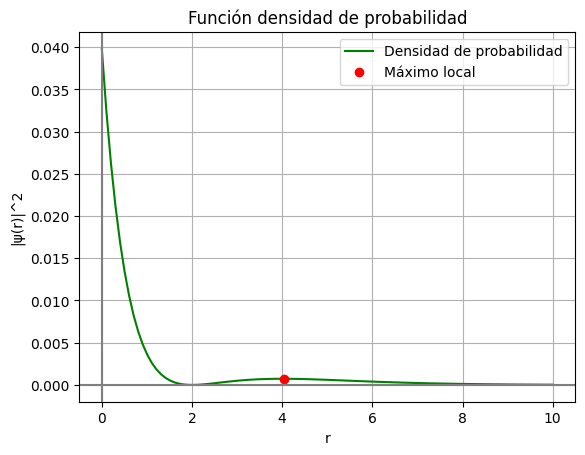

In [67]:
e_dicc = {'r': dist, 'psi_abs': dens_abs, 'dpsi/dr': d_psi}
electron = pd.DataFrame(e_dicc)


#Este ciclo busca los valores más pequeños definiendo una tolerancia de 3e-05, esto para hallar el máximo local:
lista = []
for i in range(len(electron['dpsi/dr'])):
    if abs(electron['dpsi/dr'][i]) < 3e-05:
        lista.append(i)
print(lista)

#Este es el valor del máximo local
local_max = electron['r'][40]

plt.plot(dist, dens_abs, 'g-', label='Densidad de probabilidad')
plt.plot(local_max, psi_abs(local_max), 'ro', label='Máximo local')
plt.title('Función densidad de probabilidad')
plt.legend()
plt.xlabel('r')
plt.ylabel('|ψ(r)|^2')
plt.axvline(0, color='grey', linestyle='-')
plt.axhline(0, color='grey', linestyle='-')
plt.grid()
plt.show()

## Integración con Roomberg:

In [68]:
prob_fun = lambda r: (1/8)*(r**2)*(2-r)**2 * np.exp(-r)
R = np.arange(10,26,1)

I = np.zeros(len(R))

for i in range(len(R)):
    I[i] = romberg(prob_fun, 0, R[i], rtol=1e-08)
print(I)

[0.94048069 0.96822293 0.98355194 0.9917077  0.99591304 0.9980249
 0.99906179 0.99956106 0.9997974  0.99990761 0.99995832 0.99998138
 0.99999176 0.99999638 0.99999842 0.99999932]


C:\Users\marin\AppData\Local\Temp\ipykernel_13204\47517753.py:7: DeprecationWarning: `scipy.integrate.romberg` is deprecated as of SciPy 1.12.0and will be removed in SciPy 1.15.0. Please use`scipy.integrate.quad` instead.
  I[i] = romberg(prob_fun, 0, R[i], rtol=1e-08)


## Integración por cuadratura gaussiana:

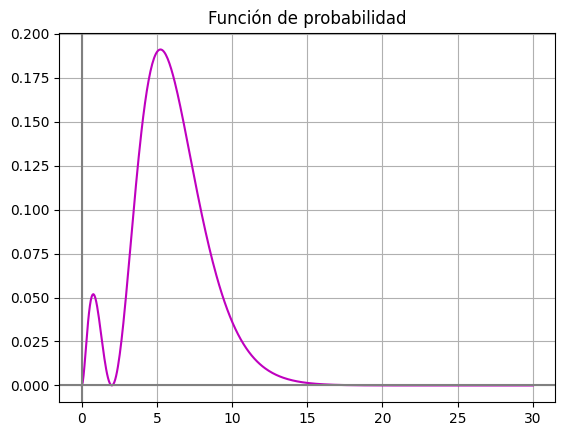

In [69]:
r = np.linspace(0,30,500)
plt.plot(r, prob_fun(r), 'm')
plt.title('Función de probabilidad')
plt.axvline(0, color='grey')
plt.axhline(0, color='grey')
plt.grid()
plt.show()

In [70]:
integral_fixed, error_fixed = fixed_quad(prob_fun, 0, 20)
print('El valor de la integral por la cuadratura fija:')
print(f'I  = {integral_fixed}')

El valor de la integral por la cuadratura fija:
I  = 1.1899647873003305


In [71]:
R = np.arange(10,50,1)

I = np.zeros(len(R))

for i in range(len(R)):
    I[i] = quadrature(prob_fun, 0, R[i])[0]

dicc_fixed = {'Límite superior': R, 'Valor de la integral': I}
gauss_fixed = pd.DataFrame(dicc_fixed)

C:\Users\marin\AppData\Local\Temp\ipykernel_13204\702384306.py:6: DeprecationWarning: `scipy.integrate.quadrature` is deprecated as of SciPy 1.12.0and will be removed in SciPy 1.15.0. Please use`scipy.integrate.quad` instead.
  I[i] = quadrature(prob_fun, 0, R[i])[0]


Para esta integral, no se requiere usar el límite de infinito para demostrar que la probabilidad de hayar el electrón es de 1, puesto que:

* Para la función integrante, cuando se halla la integral para límites superiores a 10, se obtienen valores de 0.9, lo que indica un 90% de probabilidad de hallar el electrón.
* Como los trapecios que se forman en el infinito son extremadamente pequeños, el valor de estos será de $\sim 0$, prácticamente, por lo que con tomar hasta un valor R = 30, por ejemplo, se puede concluir que la integral al infinito convergerá a 1, sin hacer los cálculos analíticos.
* **Advertencia**: Ambos métodos de cuadratura fallan cuando se les ingresa un valor muy grande, por lo que se implementaron valores grandes considerables para lo que es la distancia en la escala subatómica. Ya que infinito puede referirse también a un número muy grande para cierta escala.

In [72]:
integral_quad, error_quad = quad(prob_fun,0,10000)
print('Valor de la integral por cuadratura adaptativa:')
print(integral_quad)

Valor de la integral por cuadratura adaptativa:
1.0


In [73]:
R = np.arange(10,50,1)

I = np.zeros(len(R))

for i in range(len(R)):
    I[i] = quad(prob_fun, 0, R[i])[0]

dicc_adap = {'Límite superior': R, 'Valor de la integral': I}
gauss_adap = pd.DataFrame(dicc_adap)
gauss_adap

,Límite superior,Valor de la integral
0,10,0.940481
1,11,0.968223
2,12,0.983552
3,13,0.991708
4,14,0.995913
5,15,0.998025
6,16,0.999062
7,17,0.999561
8,18,0.999797
9,19,0.999908


# 6

Imagina que estamos estudiando el movimiento de un proyectil lanzado desde una altura inicial con una velocidad inicial en un ángulo específico. Queremos analizar el trayecto del proyectil, su altura máxima y la distancia que recorre antes de tocar el suelo.

La ecuación de la trayectoria del proyectil en términos de la distancia horizontal $x$ y la altura $y$ es:

$$ y(x) = y_0 + x \tan(\theta) - \frac{g x^2}{2 v_0^2 \cos^2(\theta)} $$

* Grafica la trayectoria del proyectil para los siguientes parámetros: $ y_0 = 1 \, \text{m} $, $ \theta = 45^\circ $, y $ v_0 = 20 \, \text{m/s} $.

* Calcula la altura máxima alcanzada por el proyectil a través de la derivada númerica y compara con el valor real.

* Encuentra la distancia horizontal total recorrida por el proyectil antes de tocar el suelo, esto implica encontrar la raíz de la ecuación $ y(x) = 0 $.

* Toma los valores de la trayectoria del proyectil en puntos de $ x \in \{0, 2, 4, 6, 8, 10\} $ y usa dos técnicas de interpolación para estimar la trayectoria en puntos intermedios.

* Si conocemos que:
$$y(t) = y_0 + v_{0y}t -\frac{1}{2}gt^2$$
encuentre el tiempo de vuelo para el proyectil. Luego, usando un método de integración encuentre cuál seria la altura alcanzada entre $0 \leq t \leq 2$s.





## **Graficando la trayectoria:**

In [74]:
yo = 1
theta = np.pi/4
vo = 20
g = 9.8
x = sp.Symbol('x')
y = yo + x*np.tan(theta) - (g*x**2)/(2*(vo**2)*np.cos(theta)**2)
dy = sp.diff(y,x)
dy_lambda = sp.lambdify(x,dy)
y_lambda = sp.lambdify(x,y)

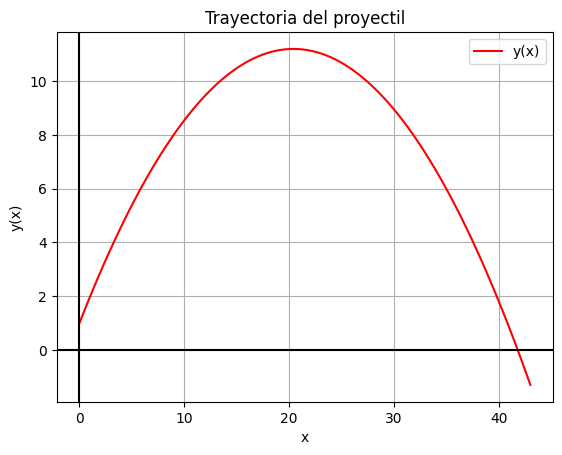

In [75]:
x = np.linspace(0,43,100)

plt.plot(x, y_lambda(x), 'r-', label='y(x)')
plt.title('Trayectoria del proyectil')
plt.legend()
plt.xlabel('x')
plt.ylabel('y(x)')
plt.axvline(0, color='black')
plt.axhline(0, color='black')
plt.grid()
plt.show()

## **Altura máxima calculada con la derivada numérica:**

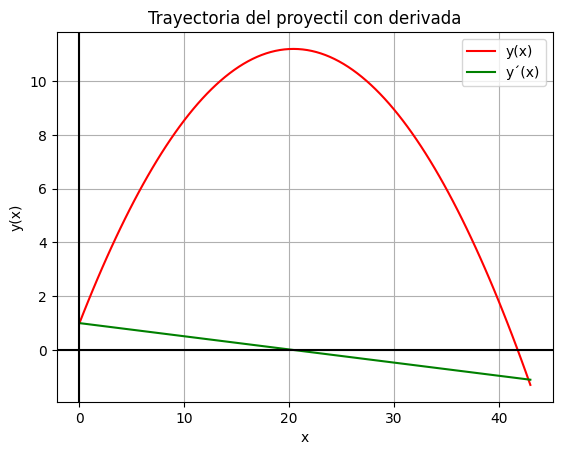

In [76]:
y_prima = np.gradient(y_lambda(x), x, edge_order=2)

plt.plot(x, y_lambda(x), 'r-', label='y(x)')
plt.plot(x, y_prima, 'g-', label='y´(x)')
plt.title('Trayectoria del proyectil con derivada')
plt.legend()
plt.xlabel('x')
plt.ylabel('y(x)')
plt.axvline(0, color='black')
plt.axhline(0, color='black')
plt.grid()
plt.show()

In [77]:
dicc1 = {'x': x, 'y(x)': y_lambda(x), 'dy/dx': y_prima}
proyectil = pd.DataFrame(dicc1)
#proyectil

In [78]:
x_h_max = proyectil['x'][49]
dy_cero = proyectil['dy/dx'][49]
h_max = proyectil['y(x)'][49]
print(f'Altura máxima: {h_max}')

Altura máxima: 11.185338179777572


Comparando con el valor real, para esto se usó la librería Sympy con su método de **sp.diff**:

In [79]:
dy_cero_real = dy_lambda(x_h_max)
print(f'Valor real: {dy_cero_real}')
print(f'Valor numérico: {dy_cero}')

Valor real: -0.04285858585858593
Valor numérico: -0.042858585858585485


## **Distancia horizontal total recorrida por el proyectil:**

In [80]:
#r1 = newton(y_lambda, -1)
r2 = newton(y_lambda, 41)

#print(f'r1 = {r1} m')
print(f'r2 = {r2} m')

r2 = 41.792958199885284 m


Para calcular la distancia total, tomamos el valor absoluto de la resta de los valores de las raíces:

In [81]:
x_total = np.abs(r2-y_lambda(0))
print(f'La distancia total recorrida horizontalmente fue de: {x_total}m')
print(f'Redondeada a tres cifras decimales: {x_total:0.3f}m')

La distancia total recorrida horizontalmente fue de: 40.792958199885284m
Redondeada a tres cifras decimales: 40.793m


## **Usando interpolación para mapear la trayectoria del proyectil:**

In [82]:
yo = 1
theta = np.pi/4
vo = 20
g = 9.8
x = sp.Symbol('x')
y = yo + x*np.tan(theta) - (g*x**2)/(2*(vo**2)*np.cos(theta)**2)
y_lambda = sp.lambdify(x,y)

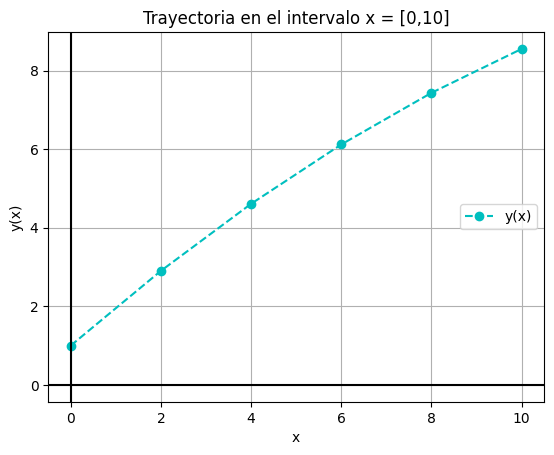

In [83]:
puntos_x = np.array([0,2,4,6,8,10])

plt.plot(puntos_x, y_lambda(puntos_x), 'co--', label='y(x)')
plt.title('Trayectoria en el intervalo x = [0,10]')
plt.legend()
plt.xlabel('x')
plt.ylabel('y(x)')
plt.axvline(0, color='black')
plt.axhline(0, color='black')
plt.grid()
plt.show()

## **Interpolación por el método de Newton**:

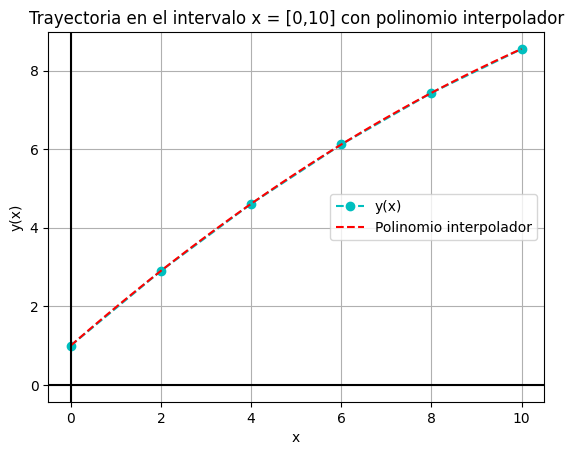

In [84]:
y_interpol_newton = BarycentricInterpolator(puntos_x, y_lambda(puntos_x))
x_continuo = np.linspace(min(puntos_x),max(puntos_x),50)

plt.plot(puntos_x, y_lambda(puntos_x), 'co--', label='y(x)')
plt.plot(x_continuo, y_interpol_newton(x_continuo), 'r--', label='Polinomio interpolador')
plt.title('Trayectoria en el intervalo x = [0,10] con polinomio interpolador')
plt.legend()
plt.xlabel('x')
plt.ylabel('y(x)')
plt.axvline(0, color='black')
plt.axhline(0, color='black')
plt.grid()
plt.show()

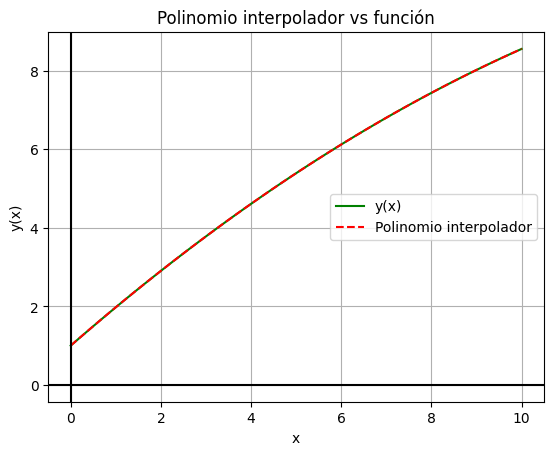

In [85]:
plt.plot(x_continuo, y_lambda(x_continuo), 'g-', label='y(x)')
plt.plot(x_continuo, y_interpol_newton(x_continuo), 'r--', label='Polinomio interpolador')
plt.title('Polinomio interpolador vs función')
plt.legend()
plt.xlabel('x')
plt.ylabel('y(x)')
plt.axvline(0, color='black')
plt.axhline(0, color='black')
plt.grid()
plt.show()

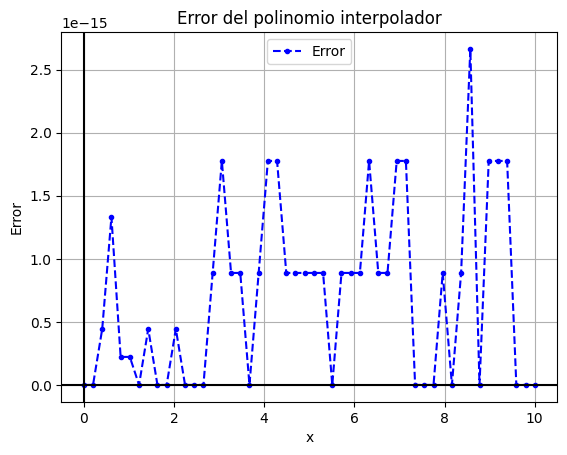

In [86]:
error = np.abs(y_interpol_newton(x_continuo) - y_lambda(x_continuo))

plt.plot(x_continuo, error, 'b.--', label='Error')
plt.title('Error del polinomio interpolador')
plt.legend()
plt.xlabel('x')
plt.ylabel('Error')
plt.axvline(0, color='black')
plt.axhline(0, color='black')
plt.grid()
plt.show()

## **Interpolación por el método de Splines Cúbicos:**

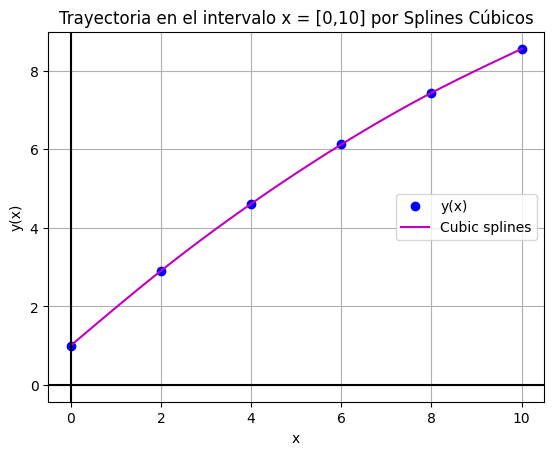

In [87]:
y_interpol_cubic = CubicSpline(puntos_x, y_lambda(puntos_x), bc_type='natural')

x_continuo = np.linspace(min(puntos_x),max(puntos_x),50)

plt.plot(puntos_x, y_lambda(puntos_x), 'bo', label='y(x)')
plt.plot(x_continuo, y_interpol_cubic(x_continuo), 'm-', label='Cubic splines')
plt.title('Trayectoria en el intervalo x = [0,10] por Splines Cúbicos')
plt.legend()
plt.xlabel('x')
plt.ylabel('y(x)')
plt.axvline(0, color='black')
plt.axhline(0, color='black')
plt.grid()
plt.show()

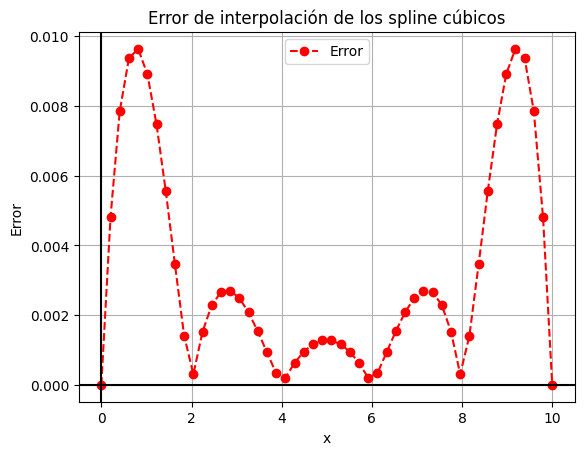

In [88]:
error = np.abs(y_lambda(x_continuo) - y_interpol_cubic(x_continuo))

plt.plot(x_continuo, error, 'ro--', label='Error')
plt.title('Error de interpolación de los spline cúbicos')
plt.legend()
plt.xlabel('x')
plt.ylabel('Error')
plt.axvline(0, color='black')
plt.axhline(0, color='black')
plt.grid()
plt.show()

## **Tiempo de vuelo del proyectil:**

In [89]:
vo_y = vo*np.sin(theta)
t = sp.Symbol('t')
y_ts = yo + vo_y*t - 0.5*g*(t**2)
dy_dts = sp.diff(y_ts, t)
dy_dt = sp.lambdify(t, dy_dts)

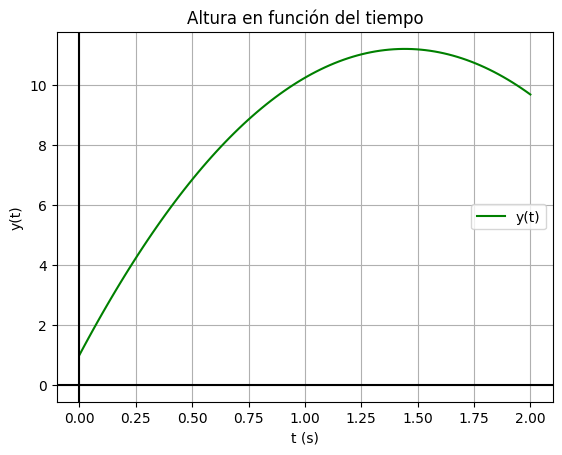

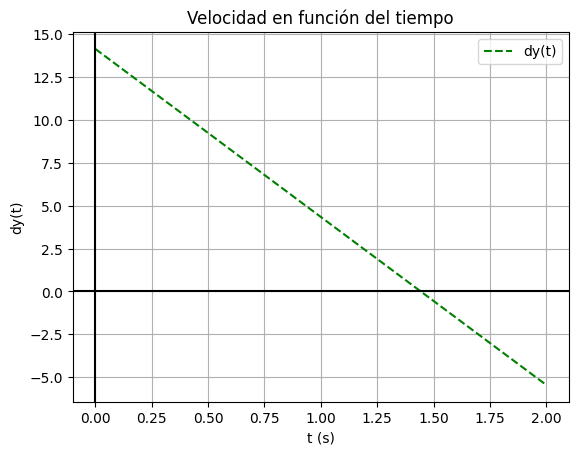

In [90]:
vo_y = vo*np.sin(theta)
t = np.linspace(0,2,100)
y_t = lambda t: yo + vo_y*t - 0.5*g*(t**2)

plt.plot(t, y_t(t), 'g-', label='y(t)')
plt.title('Altura en función del tiempo')
plt.legend()
plt.axvline(0, color='black')
plt.axhline(0, color='black')
plt.xlabel('t (s)')
plt.ylabel('y(t)')
plt.grid()
plt.show()

plt.plot(t, dy_dt(t), 'g--', label='dy(t)')
plt.title('Velocidad en función del tiempo')
plt.legend()
plt.axvline(0, color='black')
plt.axhline(0, color='black')
plt.xlabel('t (s)')
plt.ylabel('dy(t)')
plt.grid()
plt.show()

In [91]:
print(f'Aquí la derivada se hace cero: {newton(dy_dt,1)}')

Aquí la derivada se hace cero: 1.4430750636460206


In [92]:
t = np.linspace(0,2,100)
altura_trap = trapezoid(dy_dt(t),t)
print('Altura según la integración del método del trapecio:')
print(altura_trap)

Altura según la integración del método del trapecio:
8.684271247462002


In [93]:
altura_quad = quad(dy_dt,0,2)[0]
print('Altura según el procedimiento del método de cuadratura adaptativa:')
print(altura_quad)

Altura según el procedimiento del método de cuadratura adaptativa:
8.684271247462


In [94]:
altura_real = y_t(2)
print('Alutra según la función:')
print(altura_real)

Alutra según la función:
9.6842712474619


Luego de hacer los cálculos y aplicar los métodos, veo que la altura por medio de la integración difiere de la altura real que da la función parábólica que describe la altura del proyectil en el tiempo. Intuyo que esto puede deberse a la constante $y_{0}$ que se pierde en el proceso de derivada, aunque es sólo una teoría, ya que al aplicar la integral definida, esta debería dar el resultado exacto. 

Sin embargo, luego de hacer incluso el cálculo de área de manera analítica, sabiendo que el triángulo del primer cuadrante tiene dimensiones $14.14 \times 1.44$ y el triángulo menor tiene dimensiones $0.56 \times 5$, haciendo el cálculo del área de estos dos triángulos obtuve respectivamente: $10.18$ unidades cuadradas y $2.8$ unidades cuadradas. Al hacer la resta, pues el triángulo pequeño está en el cuarto cuadrante, la resta da un valor de $\sim 7.4$ unidades cuadradas.